# Chapter 18: Smoothing Methods


> (c) 2019-2020 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.
>
> Date: 2020-03-08
>
> Python Version: 3.8.2
> Jupyter Notebook Version: 5.6.1
>
> Packages:
>   - dmba: 0.0.12
>   - matplotlib: 3.2.0
>   - numpy: 1.18.1
>   - pandas: 1.0.1
>   - statsmodels: 0.11.1
>
> The assistance from Mr. Kuber Deokar and Ms. Anuja Kulkarni in preparing these solutions is gratefully acknowledged.


In [1]:
# import required packages for this chapter
from pathlib import Path
import warnings

import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools
from statsmodels.graphics import tsaplots
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import matplotlib.pylab as plt

from dmba import regressionSummary

%matplotlib inline

In [2]:
# Working directory:
#
# We assume that data are kept in the same directory as the notebook. If you keep your 
# data in a different folder, replace the argument of the `Path`
DATA = Path('.')
# and then load data using 
#
# pd.read_csv(DATA / ‘filename.csv’)

# Problem 18.1: Impact of September 11 on Air Travel in the United States
The Research and Innovative Technology Administration's Bureau of Transportation Statistics conducted a study to evaluate the impact of the September 11, 2001 terrorist attack on US transportation.  The 2006 study report and the data can be found at https://www.bts.gov/archive/publications/estimated_impacts_of_9_11_on_us_travel/index. The goal of the study was stated as follows:

> The purpose of this study is to provide a greater understanding of the passenger travel behavior patterns of persons making long distance trips before and after 9/11.

The report analyzes monthly passenger movement data between January 1990 and May 2004. Data on three monthly time series are given in file _Sept11Travel.csv_ for this period: (1) Actual airline revenue passenger miles (Air), (2) Rail passenger miles (Rail), and (3) Vehicle miles traveled (Car).

In order to assess the impact of September 11, BTS took the following approach: using data before September 11, they forecasted future data (under the assumption of no terrorist attack). Then, they compared the forecasted series with the actual data to assess the impact of the event. Our first step, therefore, is to split each of the time series into two parts: pre- and post-September 11. We now concentrate only on the earlier time series.

## Solution 18.1.a
Create a time plot for the pre-event AIR time series. What time series components appear from the plot?

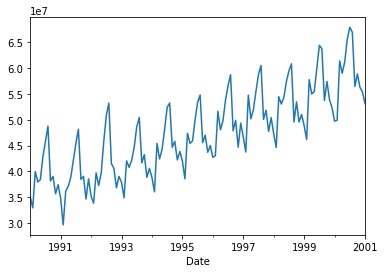

In [3]:
df = pd.read_csv(DATA / 'Sept11Travel.csv')
df['Date'] = pd.to_datetime(df.Month, format='%b-%y')

air_ts = pd.Series(df['Air RPM (000s)'].values, index=df.Date, name='Air')
rail_ts = pd.Series(df['Rail PM'].values, index=df.Date, name='Rail')
car_ts = pd.Series(df['VMT (billions)'].values, index=df.Date, name='Car')

pre_air_ts = air_ts[:'2001-01-01']
pre_air_ts.plot()
plt.show()

## Solution 18.1.b
The Figure in the book shows a time plot of the **seasonally adjusted** pre-September-11 AIR series.
Which of the following smoothing methods would be adequate for forecasting
this series? 

- Moving average (with what window width?)
- Simple exponential smoothing
- Holt exponential smoothing
- Holt--Winter's exponential smoothing


- Moving average (with what window width?) - NO
- Simple exponential smoothing - NO
- Holt exponential smoothing - YES (also called double exponential smoothing - used when a trend is present)
- Holt-Winter's exponential smoothing - NO (Holt-Winters is used when trend and seasonality are present, but the seasonality has already been removed from this series)

# Problem 18.2: Relation Between Moving Average and Exponential Smoothing
Assume that we apply a moving average to a series, using a very short window span. If we wanted to achieve an equivalent result using  simple exponential smoothing, what value should the smoothing coefficient take?

The coefficient should be a relatively high value. For example, a value of 0.5 
would attach a weight of only $(0.5)^3$ or 12.5% to the t-3 time period, and 
lesser weights to earlier periods.


# Problem 18.3: Forecasting with a Moving Average
For a given time series of sales, the training set consists of 50 months. The first 5 months' data are shown below:

```
Sep 98: 27
Oct 98: 31
Nov 98: 58
Dec 98: 63
Jan 99: 59
```

## Solution 18.3.a
Compute the sales forecast for January 1999 based on a moving average with $w = 4$.

## Solution 18.3.b
Compute the forecast error for the above forecast.

In [4]:
Sales = [27, 31, 58, 63, 59]
forecast = sum(Sales[0:4]) / 4
print('18.3a) Forecast ', forecast)
print('18.3b) Forecast error ', Sales[4] - forecast)

18.3a) Forecast  44.75
18.3b) Forecast error  14.25


In [5]:
sales = pd.Series(Sales)
movingAverage = sales.rolling(4).mean()

forecast = movingAverage[3]
print('18.3a) Forecast ', forecast)
print('18.3b) Forecast error ', sales[4] - forecast)

18.3a) Forecast  44.75
18.3b) Forecast error  14.25


# Problem 18.4: Optimizing Holt--Winter's Exponential Smoothing
The table below shows the optimal smoothing constants from applying exponential smoothing to data, using automated model selection:

```
 Level         1.000
 Trend         0.000
 Seasonality   0.246
```

## Solution 18.4.a
The value of zero that is obtained for the trend smoothing constant means that (choose one of the following):

- There is no trend.
- The trend is estimated only from the first two periods.
- The trend is updated throughout the data.
- The trend is statistically insignificant.


- There is no trend. - NO
- The trend is estimated only from the first two periods. - YES
- The trend is updated throughout the data. - NO
- The trend is statistically insignificant. - YES

## Solution 18.4.b
What is the danger of using the optimal smoothing constant values?

Overfitting

# Problem 18.5: Department Store Sales
The time plot in the Figure describes actual quarterly sales for a department store over a 6-year period (data are available in _DepartmentStoreSales.csv_, data courtesy of Chris Albright).

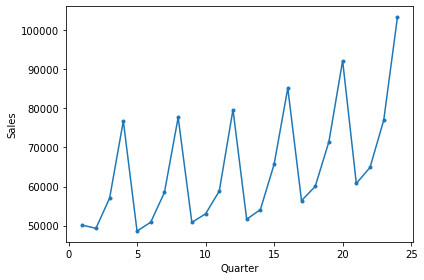

In [6]:
df = pd.read_csv(DATA / 'DepartmentStoreSales.csv')
df_ts = pd.Series(df['Sales'].values, index=df.Quarter, name='Sales')
ax = df_ts.plot(style='.-')
ax.set_ylabel('Sales')
plt.tight_layout()
plt.show()

## Solution 18.5.a
Which of the following methods would **not** be suitable for forecasting this series?

-   Moving average of raw series - Would not be suitable 
-	Moving average of deseasonalized series - Would not be suitable 
-	Simple exponential smoothing of the raw series - Would not be suitable 
-	Double exponential smoothing of the raw series - Would not be suitable 
-	Holt--Winter's exponential smoothing of the raw series
-	Regression model fit to the raw series
-	Random walk model fit to the raw series - Would not be suitable 


## Solution 18.5.b
The forecaster was tasked to generate forecasts for 4 quarters ahead. He therefore partitioned the data such that the last 4 quarters were designated as the validation period. The forecaster approached the forecasting task by using multiplicative Holt-Winter's exponential smoothing. The smoothing parameters used were $\alpha=0.2, \beta=0.15, \gamma=0.05$.

## Solution 18.5.b.i
Run this method on the data.

/Users/gedeck/opt/anaconda3/envs/dmba-notebooks/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/gedeck/opt/anaconda3/envs/dmba-notebooks/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,Quarter,Actual,Forecast,Error,mape
Quarter,,,,,
21,21,60800,58940.902683,1859.097317,0.030577
22,22,64900,61416.610944,3483.389056,0.053673
23,23,76997,72077.383125,4919.616875,0.063894
24,24,103337,95804.447363,7532.552637,0.072893


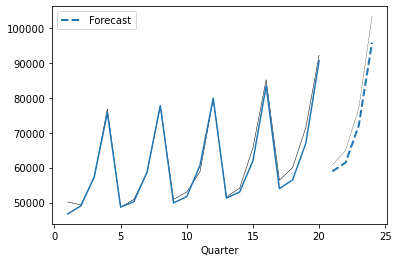

In [7]:
# run exponential smoothing with additive trend and multiplicative seasonal
expSmooth = ExponentialSmoothing(df_ts[:20], trend='additive', seasonal='multiplicative', seasonal_periods=4)
expSmoothFit = expSmooth.fit(smoothing_level=0.2, smoothing_slope=0.15, smoothing_seasonal=0.05)

ax = df_ts[:20].plot(color='black', linewidth=0.5)
df_ts[20:].plot(ax=ax, color='black', linewidth=0.25)
expSmoothFit.fittedvalues.plot(ax=ax)

forecast = pd.DataFrame({
    'Quarter': df_ts[20:].index.values, 
    'Actual': df_ts[20:],
    'Forecast': expSmoothFit.forecast(len(df_ts[20:])).values
})
forecast['Error'] = forecast['Actual'] - forecast['Forecast']
forecast['mape'] = np.abs(forecast['Error']) / np.abs(forecast['Actual'])
forecast.plot(y='Forecast', ax=ax, style='--', linewidth=2, color='C0')
forecast

# warning expected

## Solution 18.5.b.ii
The forecasts for the validation set are given above. Compute the MAPE values for the forecasts of quarters 21 and 22.

In [8]:
regressionSummary(df_ts[20:22].values, forecast['Forecast'].values[:2])


Regression statistics

                      Mean Error (ME) : 2671.2432
       Root Mean Squared Error (RMSE) : 2791.9744
            Mean Absolute Error (MAE) : 2671.2432
          Mean Percentage Error (MPE) : 4.2125
Mean Absolute Percentage Error (MAPE) : 4.2125


## Solution 18.5.c
The fit and residuals from the exponential smoothing are shown in the next Figure. Using all the information thus far, is this model suitable for forecasting quarters 21 and 22?

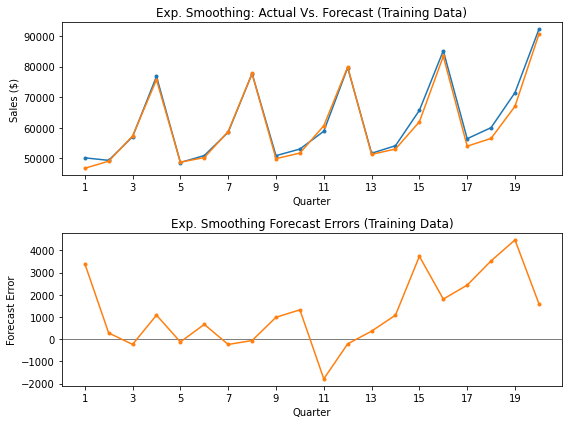

In [9]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,6))

    ax = df_ts[:20].plot(ax=axes[0], color='C0', style='.-')
    expSmoothFit.fittedvalues.plot(ax=ax, color='C1', style='.-')
    ax.set_ylabel('Sales ($)')
    ax.set_title('Exp. Smoothing: Actual Vs. Forecast (Training Data)')
    ax.xaxis.set_ticks(np.arange(1, 21, 2))

    residuals = df_ts[:20] - expSmoothFit.fittedvalues
    axes[1].axhline(y=0, color='black', linewidth=0.5)
    ax = residuals.plot(ax=axes[1], color='C1', style='.-')
    ax.set_ylabel('Forecast Error')
    ax.set_title('Exp. Smoothing Forecast Errors (Training Data)')
    ax.xaxis.set_ticks(np.arange(1, 21, 2))

plt.tight_layout()
plt.show()

From the plots we can see that the actual and forecasted values in periods 
21-22 match well in Holt Winter's exponential smoothing; better than in the 
regression model. The MAPE for Holt Winter's exponential smoothing (4.21%) is 
also lower than the MAPE for the regression model (4.69%, see Problem 17.5). This implies that
the more suitable model for forecasting quarters 21 and 22 is Holt Winter's 
exponential smoothing. However, there could be other practical reasons that 
would make the regression model preferable.

# Problem 18.6: Shipments of Household Appliances
The time plot in the Figure shows the series of quarterly shipments (in million dollars) of US household appliances between 1985--1989 (data are available in _ApplianceShipments.csv_, data courtesy of Ken Black).

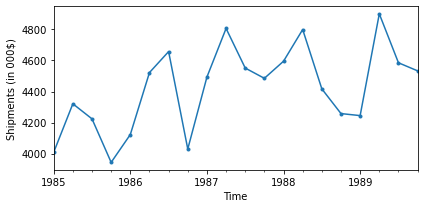

In [10]:
df = pd.read_csv(DATA / 'ApplianceShipments.csv')
df = df [['Quarter', 'Shipments']]
# convert Quarter information into month-year
for q, m in ('Q1', '03'), ('Q2', '06'), ('Q3', '09'), ('Q4', '12'):
    df['Quarter'] = df['Quarter'].str.replace(q, m)
df['Quarter'] = pd.to_datetime(df.Quarter, format='%m-%Y')

df_ts = pd.Series(df['Shipments'].values, index=df.Quarter, name='shipments')
df_ts.index = df_ts.index.to_period("Q")

ax = df_ts.plot(style='.-', figsize=(6,3))
ax.set_ylabel('Shipments (in 000$)')
ax.set_xlabel('Time')
plt.tight_layout()
plt.show()

## Solution 18.6.a
Which of the following methods would be suitable for forecasting this series if applied to the raw data?

-   Moving average - NO
-	Simple exponential smoothing - NO
-	Double exponential smoothing - NO 
-	Holt--Winter's exponential smoothing -YES


## Solution 18.6.b
Apply a moving average with window span $w=4$ to the data. Use all but the last year as the training set. Create a time plot of the moving average series.

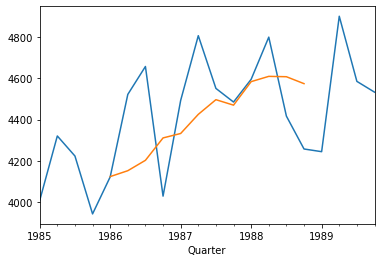

Quarter
1989Q1    4245
1989Q2    4900
1989Q3    4585
1989Q4    4533
Freq: Q-DEC, Name: shipments, dtype: int64

In [11]:
ax = df_ts.plot(x='Quarter', y='Shipments')

ma_trailing = df_ts[:-4].rolling(4).mean()
ma_trailing = pd.Series(ma_trailing[:-1].values, index=ma_trailing.index[1:])

ma_trailing.plot(ax=ax)
plt.show()
df_ts[-4:]

### Solution 18.6.b.i
What does the MA(4) chart reveal?

There is an increasing trend until 1987, then a slight decreasing trend, with a final stabilization.

### Solution 18.6.b.ii
Use the MA(4) model to forecast appliance sales in Q1-1990.

### Solution 18.6.b.iii
Use the MA(4) model to forecast appliance sales in Q1-1991.

In [12]:
ma_trailing_full = df_ts.rolling(4).mean()
print(f'forecast Q1-1990: {ma_trailing_full[-1]}')
print(f'forecast Q1-1991: same as stable trend {ma_trailing_full[-1]}')

forecast Q1-1990: 4565.75
forecast Q1-1991: same as stable trend 4565.75


### Solution 18.6.b.iv
Is the forecast for Q1-1990 most likely to under-estimate, over-estimate or accurately estimate the actual sales on Q1-1990? Explain.

It should be fairly accurate - the recent trend is stable, and Q1 values have 
been close to trend in the past.

### Solution 18.6.b.v
Management feels most comfortable with moving averages. The analyst therefore plans to use this method for forecasting future quarters. What else should be considered before using the MA(4) to forecast future quarterly shipments of household appliances?

Seasonal adjustment

## Solution 18.6.c
We now focus on forecasting beyond 1989. In the following, continue to use all but the last year as the training set, and the last four quarters as the validation set. First, fit a regression model to sales with a linear trend and quarterly seasonality to the training data. Next, apply Holt--Winter's exponential smoothing with smoothing parameters $\alpha=0.2, \beta=0.15, \gamma=0.05$ to the training data. Choose an adequate 'season length.'

Regression model

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     8.208
Date:                Sun, 08 Mar 2020   Prob (F-statistic):            0.00255
Time:                        20:21:23   Log-Likelihood:                -100.84
No. Observations:                  16   AIC:                             211.7
Df Residuals:                      11   BIC:                             215.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4054.9250    101.132     40.095      

/Users/gedeck/opt/anaconda3/envs/dmba-notebooks/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


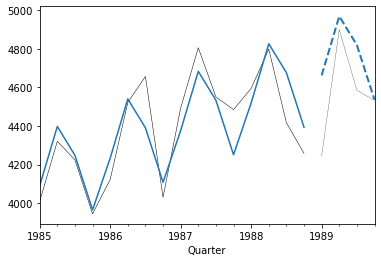

In [13]:
df_lm = tsatools.add_trend(pd.Series(df.Shipments.values, index=df.Quarter, name='Sales'), trend='ct')
df_lm['Qtr'] = df_lm.index.quarter
modelA = sm.ols(formula='Sales ~ trend + C(Qtr)', data=df_lm[:-4]).fit()
# warning expected
print(modelA.summary())
ax = df_ts[:-4].plot(color='black', linewidth=0.5)
df_ts[-4:].plot(ax=ax, color='black', linewidth=0.25)
modelA.fittedvalues.plot(ax=ax)
modelA.predict(df_lm[-4:]).plot(ax=ax, style='--', linewidth=2, color='C0')
plt.show()

In [14]:
regressionSummary(df_lm[:-4].Sales, modelA.fittedvalues)


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 132.0699
            Mean Absolute Error (MAE) : 104.0688
          Mean Percentage Error (MPE) : -0.0906
Mean Absolute Percentage Error (MAPE) : 2.3544


### Solution 18.6.c.i
Compute the MAPE for the validation data using the regression model.

In [15]:
regressionSummary(df_lm[-4:].Sales, modelA.predict(df_lm[-4:]))


Regression statistics

                      Mean Error (ME) : -181.1250
       Root Mean Squared Error (RMSE) : 241.8138
            Mean Absolute Error (MAE) : 181.1250
          Mean Percentage Error (MPE) : -4.1085
Mean Absolute Percentage Error (MAPE) : 4.1085


### Solution 18.6.c.ii
Compute the MAPE for the validation data using Holt-Winter's exponential smoothing.

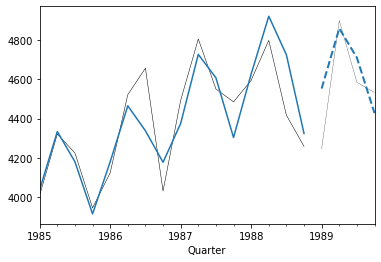

In [16]:
expSmooth = ExponentialSmoothing(df_ts[:-4], trend='additive', seasonal='additive', seasonal_periods=4, freq='Q')
expSmoothFit = expSmooth.fit()

ax = df_ts[:-4].plot(color='black', linewidth=0.5)
df_ts[-4:].plot(ax=ax, color='black', linewidth=0.25)
expSmoothFit.fittedvalues.plot(ax=ax)
expSmoothFit.forecast(4).plot(ax=ax, style='--', linewidth=2, color='C0')
plt.show()

In [17]:
regressionSummary(df_lm[-4:].Sales, expSmoothFit.forecast(4))


Regression statistics

                      Mean Error (ME) : -71.9849
       Root Mean Squared Error (RMSE) : 175.6162
            Mean Absolute Error (MAE) : 144.7682
          Mean Percentage Error (MPE) : -1.7119
Mean Absolute Percentage Error (MAPE) : 3.2845


### Solution 18.6.c.iii
Which model would you prefer to use for forecasting Q1-1990? Give three reasons.

Regression: simplicity, low MAPE on the validation data, small residuals. 

Holt-Winter's exponential smoothing shows only a very small improvment over regression 
#also does not show large improvement over Regression, is not as simple.


### Solution 18.6.c.iv
If we optimize the smoothing parameters in the Holt-Winter's method, is it likely to get values that are close to zero? Why or why not?

Yes. It appears that both the regression and HW models yield very similar results, 
and therefore there is probably a global trend/seasonality going on. 
The Holt-Winter's model would be able to capture this at the start and then would not 
need to update anymore.

# Problem 18.7: Shampoo Sales
The time plot in Figure 18.10 describes monthly sales of a certain shampoo over a 3-year period. \[Data are available in _ShampooSales.csv_, Source: Hyndman and Yang (2018).

Which of the following methods would be suitable for forecasting this series if applied to the raw data?

- Moving average
- Simple exponential smoothing
- Double exponential smoothing
- Holt-Winter's exponential smoothing

Double exponential smoothing is correct - the series shows a trend, but no 
apparent seasonality (which makes sense; monthly sales of shampoo could vary 
with sales or promotions but should not differ systematically by month or 
quarter)

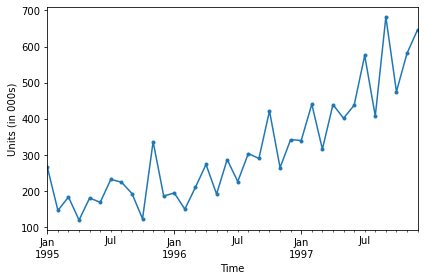

In [18]:
df = pd.read_csv(DATA / 'ShampooSales.csv')
df_ts = pd.Series(df['Shampoo Sales'].values, index=pd.to_datetime(df.Month, format='%b-%y'), name='souvenir')
ax = df_ts.plot(style='.-')
ax.set_xlabel('Time')
ax.set_ylabel('Units (in 000s)')

plt.tight_layout()
plt.show()

# Problem 18.8: Natural Gas Sales
Figure 18.11 is a time plot of quarterly natural gas sales (in billions of BTU) of a certain company, over a period of 4 years (data courtesy of George McCabe). 
The company's analyst is asked to use a moving average to forecast sales in Winter 2005.

## Solution 18.8.a 
Reproduce the time plot with the overlaying MA(4) line.

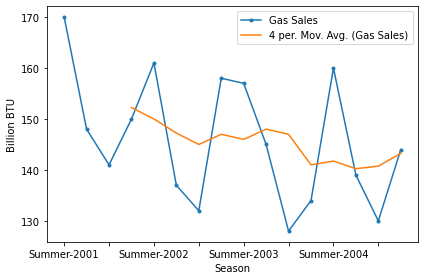

In [19]:
df = pd.read_csv(DATA / 'NaturalGasSales.csv')
ax = df.plot(x='Quarter', y='Gas Sales', style='.-')
ma_trailing = df['Gas Sales'].rolling(4).mean()
ma_trailing.plot(ax=ax)
ax.legend(["Gas Sales", "4 per. Mov. Avg. (Gas Sales)"]);
ax.set_xlabel('Season')
ax.set_ylabel('Billion BTU')
ax.set_xticklabels(['', 'Summer-2001', '', 'Summer-2002', '', 'Summer-2003', '', 'Summer-2004'])

plt.tight_layout()
plt.show()

## Solution 18.8.b
What can we learn about the series from the MA line?

Sales are on a declining trend.

## Solution 18.8.c 
Run a moving average forecaster with adequate season length. Are forecasts generated by this method expected to over-forecast, under-forecast, or accurately forecast actual sales? Why?

In [20]:
print('Forecast sales: ', ma_trailing.iloc[-1])

Forecast sales:  143.25


Because of the declining trend, a simple moving average will tend to overestimate future sales.

# Problem 18.9: Australian Wine Sales
Figure 18.12 shows time plots of monthly sales of six types of Australian wines  (red, rose, sweet white, dry white, sparkling, and fortified) for 1980-1994. \[Data are available in _AustralianWines.csv_, Source: Hyndman and Yang (2018).\] The units are thousands of litres. You are hired to obtain short-term forecasts (2-3~months ahead) for each of the six series, and this task will be repeated every month.

In [21]:
df = pd.read_csv(DATA / 'AustralianWines.csv', na_values=['*'])
df['Date'] = pd.to_datetime(df.Month, format='%b-%y')
df.head()

,Month,Fortified,Red,Rose,sparkling,Sweet white,Dry white,Date
0,Jan-80,2585,464,112.0,1686,85,1954,1980-01-01
1,Feb-80,3368,675,118.0,1591,89,2302,1980-02-01
2,Mar-80,3210,703,129.0,2304,109,3054,1980-03-01
3,Apr-80,3111,887,99.0,1712,95,2414,1980-04-01
4,May-80,3756,1139,116.0,1471,91,2226,1980-05-01


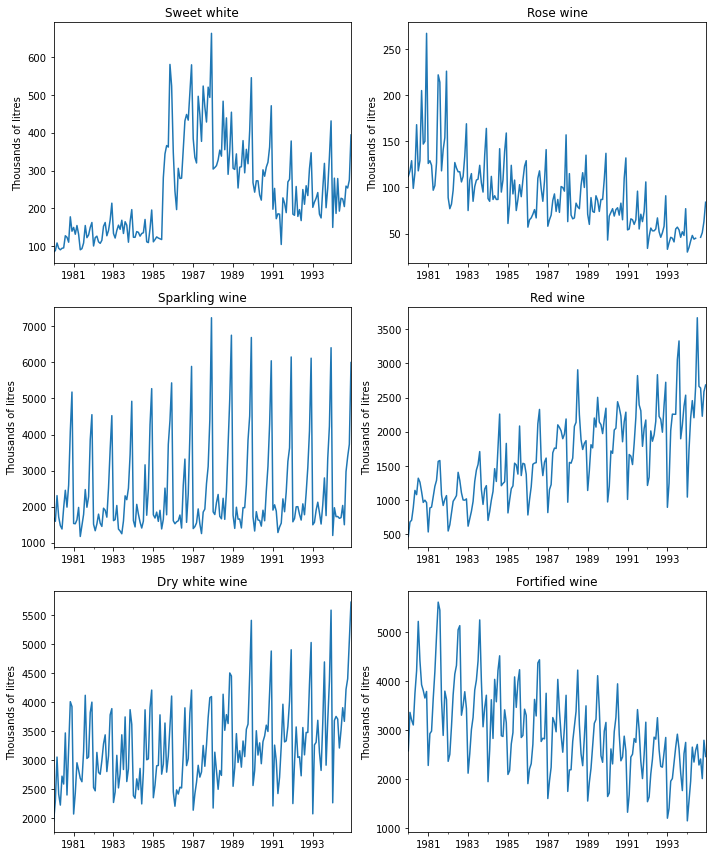

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,12))
params = [
    {'ax': axes[0, 0], 'title': 'Sweet white', 'y': 'Sweet white'},
    {'ax': axes[0, 1], 'title': 'Rose wine', 'y': 'Rose'},
    {'ax': axes[1, 0], 'title': 'Sparkling wine', 'y': 'sparkling'},
    {'ax': axes[1, 1], 'title': 'Red wine', 'y': 'Red'},
    {'ax': axes[2, 0], 'title': 'Dry white wine', 'y': 'Dry white'},
    {'ax': axes[2, 1], 'title': 'Fortified wine', 'y': 'Fortified'},
]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for param in params:
        ax = df.plot(x='Date', **param)
        ax.set_xlabel('')
        ax.set_ylabel('Thousands of litres')
        ax.get_legend().remove()
plt.tight_layout()
plt.show()

## Solution 18.9.a
Which forecasting method would you choose if you had to choose the same method for all series?
Why?

Model/Method: Holt-Winter's exponential smoothing
Reasons:
1. Ability of the model to capture both seasonality and trend that are present in the various data series.
2. Adaptability of the model - will adapt to the various patterns of different data series.
3. Holt-Winter's model is a reasonable model for all series - it will be 
    able to capture and adjust to changing levels of trends and seasonality 
    swings. It is parsimonious and should produce good fit as well as good forecasts.


## Solution 18.9.b
Fortified wine has the largest market share of the above six types of wine. You are asked to focus on fortified wine sales alone, and produce as accurate as possible forecasts for the next 2 months.

- Start by partitioning the data using the period until December 1993 as the training set.
- Apply Holt-Winter's exponential smoothing to sales with an appropriate season length (use smoothing parameters $\alpha=0.2, \beta=0.15, \gamma=0.05$).

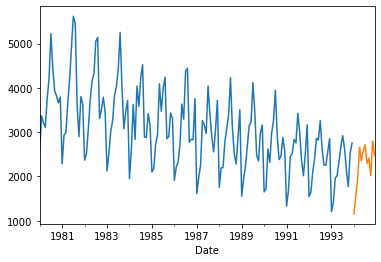

In [23]:
df = pd.read_csv(DATA / 'AustralianWines.csv', na_values=['*'])
df['Date'] = pd.to_datetime(df.Month, format='%b-%y')
df.index = df.Date

train_df = df[:'1993-12-31'].Fortified
valid_df = df['1994-01-01':].Fortified
ax = train_df.plot()
valid_df.plot(ax=ax)
plt.show()

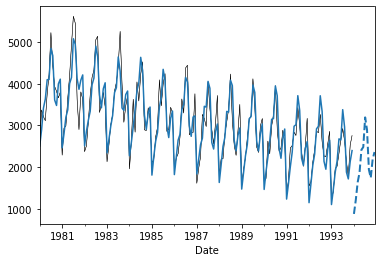

In [24]:
expSmooth = ExponentialSmoothing(train_df, trend='additive', seasonal='additive', seasonal_periods=12, freq='MS')
expSmoothFit = expSmooth.fit(smoothing_level=0.2, smoothing_slope=0.15, smoothing_seasonal=0.05)

ax = train_df.plot(color='black', linewidth=0.5)
train_df.plot(ax=ax, color='black', linewidth=0.25)
expSmoothFit.fittedvalues.plot(ax=ax)
expSmoothFit.forecast(len(valid_df)).plot(ax=ax, style='--', linewidth=2, color='C0')
plt.show()

## Solution 18.9.c
Create an ACF plot for the residuals from the Holt-Winter's exponential smoothing until lag-12.

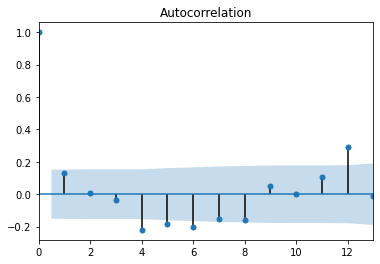

In [25]:
tsaplots.plot_acf(expSmoothFit.resid)
plt.xlim(0, 13)
plt.show()

### Solution 18.9.c.i
Examining this plot, which of the following statements are reasonable conclusions?

- Decembers (month 12) are not captured well by the model.
- There is a strong correlation between sales on the same calendar month.
- The model does not capture the seasonality well.
- We should try to fit an autoregressive model with lag-12 to the residuals.
- We should first deseasonalize the data and then apply Holt-Winter's exponential smoothing.

Answers:
- Decembers (month 12) are not captured well by the model. - NO
- There is a strong correlation between sales on the same calendar month. - YES
- The model does not capture the seasonality well. - YES
- We should try to fit an autoregressive model with lag-12 to the residuals. - YES
- We should first deseasonalize the data and then apply Holt-Winter's exponential smoothing. - NO

### Solution 18.9.c.i
How can you handle the above effect without adding another layer to your model?

Increase gamma in Holt-Winters model.

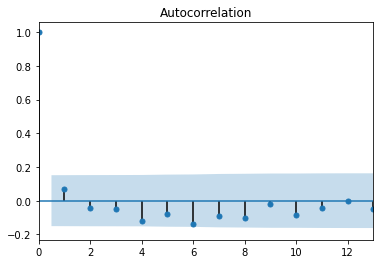

In [26]:
expSmooth = ExponentialSmoothing(train_df, trend='additive', seasonal='additive', seasonal_periods=12, freq='MS')
expSmoothFit = expSmooth.fit(smoothing_level=0.2, smoothing_slope=0.15, smoothing_seasonal=0.4)

tsaplots.plot_acf(expSmoothFit.resid)
plt.xlim(0, 13)
plt.show()